<a href="https://colab.research.google.com/github/Ambrgna/CS-5530-Assignment-2/blob/main/diabetes/src/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read Raw Data

In [23]:
url = 'https://raw.githubusercontent.com/Ambrgna/CS-5530-Assignment-2/refs/heads/main/diabetes/data_raw/raw_diabetes_data.csv'
df = pd.read_csv(url)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Set a seed

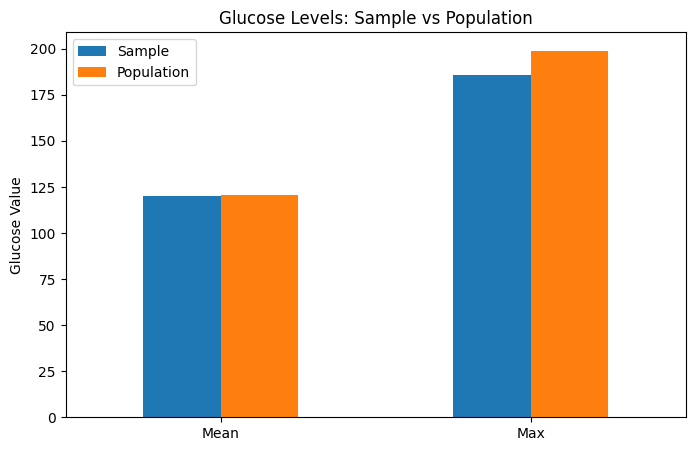

In [24]:
sample = df.sample(25, random_state=11)
sample_mean = sample["Glucose"].mean()
population_mean = df["Glucose"].mean()
sample_max = sample["Glucose"].max()
population_max = df["Glucose"].max()

stats = {
    "Sample": [sample_mean, sample_max],
    "Population": [population_mean, population_max]
}

df_stats = pd.DataFrame(stats, index=["Mean", "Max"])

df_stats.plot(kind="bar", figsize=(8, 5))
plt.title("Glucose Levels: Sample vs Population")
plt.ylabel("Glucose Value")
plt.xticks(rotation=0)
plt.show()



Find the 98th percentile

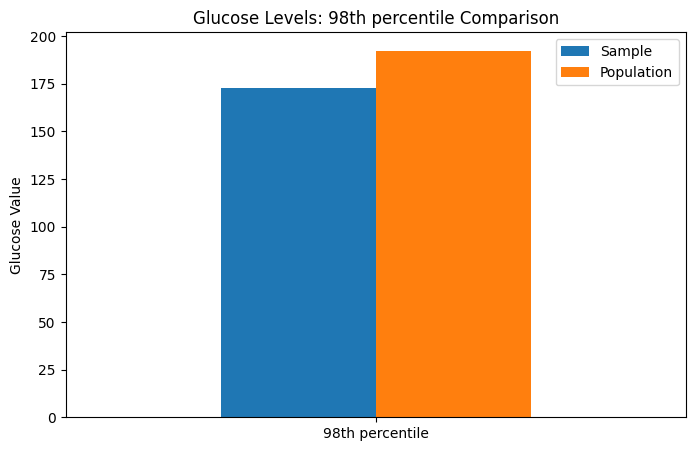

In [25]:
sample_98 = sample["Glucose"].quantile(0.98)
population_98 = df["Glucose"].quantile(0.98)

stats = {
    "Sample": [sample_98],
    "Population": [population_98]
}

df_stats = pd.DataFrame(stats, index=["98th percentile"])

df_stats.plot(kind="bar", figsize=(8, 5))
plt.title("Glucose Levels: 98th percentile Comparison")
plt.ylabel("Glucose Value")
plt.xticks(rotation=0)
plt.show()

Bootstrap

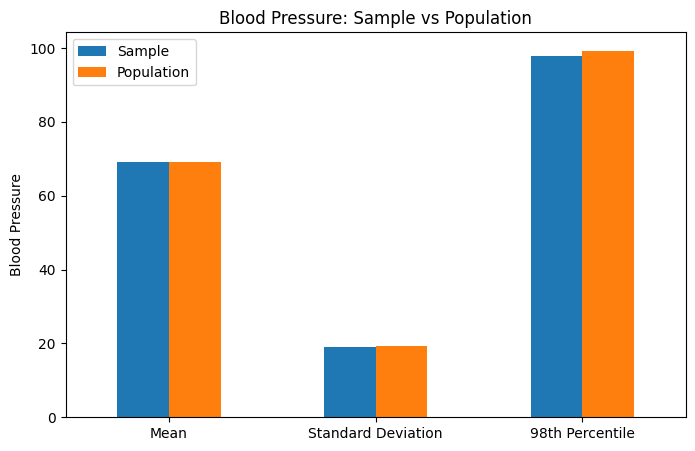

In [26]:
population_mean = df["BloodPressure"].mean()
population_std = df["BloodPressure"].std()
population_98 = df["BloodPressure"].quantile(0.98)

n_bootstraps = 500
boot_means = []
boot_stds = []
boot_98 = []

for _ in range(n_bootstraps):
    sample = df["BloodPressure"].sample(n=150, replace=True)

    boot_means.append(sample.mean())
    boot_stds.append(sample.std())
    boot_98.append(sample.quantile(0.98))

boot_means = np.array(boot_means)
boot_stds = np.array(boot_stds)
boot_98 = np.array(boot_98)

stats = {
    "Sample": [boot_means.mean(), boot_stds.mean(), boot_98.mean()],
    "Population": [population_mean, population_std, population_98]
}

df_stats = pd.DataFrame(stats, index=["Mean", "Standard Deviation", "98th Percentile"])

df_stats.plot(kind="bar", figsize=(8, 5))
plt.title("Blood Pressure: Sample vs Population")
plt.ylabel("Blood Pressure")
plt.xticks(rotation=0)
plt.show()

Findings

The chart shows that, based on 500 bootstrap samples of 150 observations each, the sample mean, standard deviation, and 98th percentile of Blood Pressure are very close to the corresponding population values. This indicates that the bootstrap samples accurately represent the population data, and the chart visually confirms this agreement.